# IMPORT

In [33]:
import numpy as np
import matplotlib.pyplot as plt

from importlib import reload
import random_graph, pdmm, pdmm_median

reload(random_graph)
reload(pdmm)
reload(pdmm_median)

from random_graph import *
from pdmm import *
from pdmm_median import *

### Generate Graph

In [34]:
# Set random seed for reproducibility
np.random.seed(42)

# Graph parameters
a = 100                             # Field size
n = 150                              # Number of agents
r = a * np.sqrt(2 * np.log2(n)/n)   # Communication range
r = 15   # Communication range

# Generate agent positions
field_range = np.array([[0, a], [0, a]])
sensor_positions = np.array([
    np.random.uniform(field_range[0, 0], field_range[0, 1], n),
    np.random.uniform(field_range[1, 0], field_range[1, 1], n)
])

# Calculate adjacency matrix based on communication range
adjacency_matrix = calculate_adjacency_matrix(sensor_positions, r)

Plot graph and check connectivity

The communication range is: 15.00
The graph is connected: False


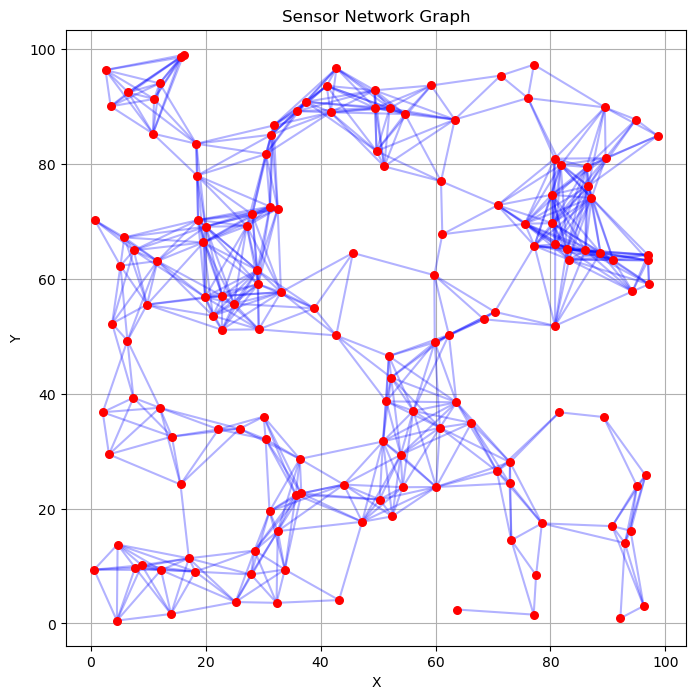

In [ ]:
print(f"The communication range is: {r:.2f}")
print(f"The graph is connected: {is_connected(adjacency_matrix)}") # Is connected is not working
plot_graph(sensor_positions, adjacency_matrix)

### Run Synchronous PDMM

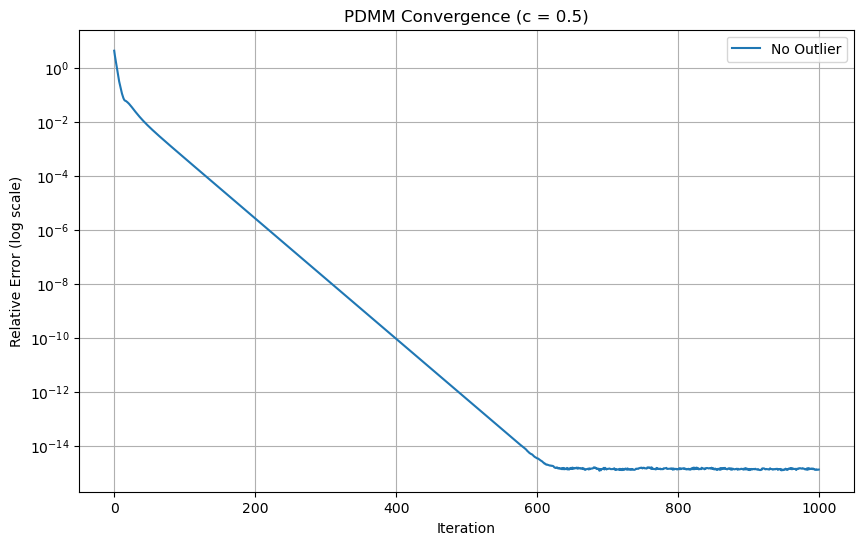

True average: 50.6138
Final average across agents: 50.6138
Min agent value: 50.6138, Max agent value: 50.6138
Final relative error: 1.3196e-15
Sensor values: [50.4557184  43.48399652 71.43944089 56.33919022 29.74857413 51.86454315
 43.38213535 58.52433335 42.07479262 48.85263559 55.04987279 58.65755194
 37.99703593 46.65498764 45.25054689 43.46670767 67.6545424  54.04981711
 37.39116046 59.17861947 71.22156197 60.32465261 34.80630034 45.15765927
 62.66911149 42.92330534 54.43819428 57.74634053 40.73069528 49.40474644
 17.5873266  39.75612359 47.47431849 37.52216818 66.32411304 35.69858622
 45.59955513 51.30740577 64.41273289 35.64137849 61.63163752 50.10233061
 40.18491349 54.62103474 51.99059696 43.99783123 50.69802085 46.14686403
 51.13517345 56.62130675 65.86016816 37.62184501 71.33033375 30.479122
 48.48214905 55.88317206 52.80991868 43.7730048  47.9187775  45.06999065
 44.10635243 58.49602097 53.57015486 43.07090405 58.99599875 53.07299521
 58.12862119 56.29628842 41.71004989 44.3

In [36]:
# PDMM parameters
max_iter = 1000                     # Max PDMM iterations
rho = 0.5                           # Penalty parameter (c)

sensor_values = np.random.randn(n) * 10 + 50
errors, values = pdmm(sensor_values, adjacency_matrix, rho, max_iter)

plt.figure(figsize=(10, 6))
plt.semilogy(range(len(errors)), errors, label='No Outlier')

plt.xlabel('Iteration')
plt.ylabel('Relative Error (log scale)')
plt.title(f'PDMM Convergence (c = {rho})')
plt.legend()
plt.grid(True)
plt.show()

print(f"True average: {np.mean(sensor_values):.4f}")
print(f"Final average across agents: {np.mean(values):.4f}")
print(f"Min agent value: {np.min(values):.4f}, Max agent value: {np.max(values):.4f}")
print(f"Final relative error: {errors[-1]:.4e}")
print(f"Sensor values: {sensor_values}")